In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits, ascii
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy import units as u

from IPython.display import Image
from skimage.io import imread

from toasty import toast, cartesian_sampler, normalizer

from collections import defaultdict, namedtuple

In [ ]:
fitsFile = fits.open('rings.v3.skycell.0776.087.stk.g.unconv.fits')
fitsFile.info()

In [ ]:
wcs.validate('rings.v3.skycell.0776.087.stk.g.unconv.fits')

In [ ]:
w = wcs.WCS(fitsFile[1].header)
lon, lat = w.all_pix2world(30, 40, 0)
print(lon,lat)
p = w.all_world2pix(210.84957670452124,53.9779632935173,0)
print(p)

In [ ]:
rawFits = fits.open('7978055158.gpc1:LAP.PV3.20140730.ipp:2014:11:29:RINGS.V3:skycell.0802.079:RINGS.V3.skycell.0802.079.stk.3983989.unconv.num.fits')
rawFits.info()

In [ ]:
rfWcs = wcs.WCS(rawFits[1].header)
footprint = rfWcs.calc_footprint(rawFits[1].header)
footprint

In [ ]:
rfWcs.all_pix2world(0,0,0)

In [ ]:
edgeCoords = rfWcs.all_world2pix(footprint,0)
edgeCoords

In [ ]:
edgePixs = edgeCoords.astype(int)
edgePixs

In [ ]:
imgData = fitsFile[1].data
imgData.shape

In [ ]:
temp = [x for x in imgData.flatten() if not np.isnan(x)]

In [ ]:
temp=np.array(temp)

In [ ]:
print(temp.min())
print(temp.max())

In [ ]:
imgData[:4,:4]

In [ ]:
imgData = imgData[:3125,:6250]
imgData.shape

In [ ]:
plt.imshow(imgData, cmap='gray')

In [ ]:
sampler = normalizer(cartesian_sampler(imgData), 0, 1)
depth = 2
output = 'toasts/pan1'

In [ ]:
toast(sampler,depth,output)

In [ ]:
Image(filename="toasts/pan1/0/0/0_0.png")

In [ ]:
Pos = namedtuple('Pos', 'n x y')
level1 = [[np.radians(c) for c in row]
          for row in [[(0, -90), (90, 0), (0, 90), (180, 0)],
                      [(90, 0), (0, -90), (0, 0), (0, 90)],
                      [(0, 90), (0, 0), (0, -90), (270, 0)],
                      [(180, 0), (0, 90), (270, 0), (0, -90)]]
        ]
level1

In [ ]:
todo = [(Pos(n=1, x=0, y=0), level1[0], True),
        (Pos(n=1, x=1, y=0), level1[1], False),
        (Pos(n=1, x=1, y=1), level1[2], True),
        (Pos(n=1, x=0, y=1), level1[3], False)]

In [ ]:
todo

In [ ]:
l = np.array([0,0,1,1])
b = np.array([0,1,0,1])

In [ ]:
data

In [ ]:
data[b,l]

In [ ]:
def panstarrsSampler():
    fitsFile = fits.open('rings.v3.skycell.2381.053.stk.g.unconv.fits')
    rfWcs = wcs.WCS(fitsFile[1].header)
    footprint = rfWcs.calc_footprint(fitsFile[1].header)
    skycoordFootprint = np.array([SkyCoord(*x,frame='icrs', unit='deg') for x in footprint])
    imgData = fitsFile[1].data
    fitsFile.close()
    
    def vec2Pix(l,b):
        #print(l)
        #print(b)
        print("vec2pix")
        tile = np.zeros(l.shape)
        skyposes = SkyCoord(ra=l*u.rad,dec=b*u.rad, frame='icrs')
        #print(skyposes.shape)
        for (x,y),pos in np.ndenumerate(skyposes):
            #print(pos)
            if coordInFootprint(pos,skycoordFootprint):
                #print("woot")
                pLoc = rfWcs.all_world2pix(pos.icrs.ra,pos.icrs.dec,0)
                #print(pLoc)
                pix = imgData[int(pLoc[0]),int(pLoc[1])]
                #print(pix)
                if not np.isnan(pix):
                    tile[x,y] = pix
                #else:
                #    tile.append(0)
            #else:
            #    tile.append(0)
        return tile
    
    return vec2Pix
        
    
    

In [ ]:
fitsFile = fits.open('rings.v3.skycell.2381.053.stk.r.unconv.fits')
imgData = fitsFile[1].data
plt.imshow(imgData, cmap='gray')
plt.colorbar()

In [ ]:
temp = [x for x in imgData.flatten() if not np.isnan(x)]
print(min(temp))
print(max(temp))

In [ ]:
rfWcs = wcs.WCS(fitsFile[1].header)
#footprint=np.array([SkyCoord(*x,frame='icrs',unit='deg') for x in rfWcs.calc_footprint(fitsFile[1].header)])
footprint = rfWcs.calc_footprint(fitsFile[1].header)
print(footprint)

In [ ]:
imgData.shape

In [ ]:
edgeCoords = rfWcs.all_world2pix(footprint,0).astype(int)
print(edgeCoords)

In [ ]:
print(len(imgData[0]))
print(len(imgData))

In [ ]:
def coordInFootprint(skycoord,footprint): #MAKE THIS BETTER
    #print(skycoord.icrs)
    #print([x.icrs for x in footprint])
    #print(footprint[0].icrs.dec, skycoord.icrs.dec, footprint[1].icrs.dec)
    #print(footprint[2].icrs.ra, skycoord.icrs.ra, footprint[1].icrs.ra)
    if ((skycoord.icrs.dec >= footprint[0].icrs.dec) and (skycoord.icrs.dec <= footprint[1].icrs.dec)) and \
        ((skycoord.icrs.ra >= footprint[2].icrs.ra) and (skycoord.icrs.ra <= footprint[1].icrs.ra)):
        return True
    return False

In [ ]:
i = 0

In [ ]:
def panstarrsSampler():

    def vec2Pix(raArr,decArr):
        
        #tile = np.zeros(raArr.shape)
        
        raArr[raArr < 0] += 2 * np.pi # making all ras 0 - 2pi
        
        raCorners = np.array([raArr[0][0],raArr[0][-1],raArr[-1][0],raArr[-1][-1]])
        decCorners = np.array([decArr[0][0],decArr[0][-1],decArr[-1][0],decArr[-1][-1]])       
        minRa = min(raCorners)
        maxRa = max(raCorners)
        minDec = min(decCorners)
        maxDec = max(decCorners)
        
        
        global i
    
        if(i == 0):
            print("This is the red quadrant")
            tile = np.full((256,256,3),[188,31,0],np.uint8)
            i += 1
        elif(i == 1):
            print("This is the green quadrant")
            tile = np.full((256,256,3),[39,101,29],np.uint8)
            i += 1
        elif(i == 2):
            print("This is the yellow quadrant")
            tile = np.full((256,256,3),[255,188,0],np.uint8)
            i += 1
        elif(i == 3):
            print("This is the purple quadrant")
            tile = np.full((256,256,3),[96,30,146],np.uint8)
            i = 0
        
        
        print("Tile Corners")
        print("(",raArr[0][0],",",decArr[0][0],") (",raArr[0][-1],",",decArr[0][-1],")")
        print("(",raArr[-1][0],",",decArr[-1][0],") (",raArr[-1][-1],",",decArr[-1][-1],")")
        print()

        return tile
    
    return vec2Pix

In [ ]:

sampler = panstarrsSampler()
output = '/Users/cbrasseur/Documents/Portal/Mashup/Clients/AstroView/testToast/'
depth = 1  
toast(sampler, depth, output)

In [ ]:
fitsFile = fits.open('rings.v3.skycell.2381.053.stk.g.unconv.fits')
print(fitsFile.info())
rfWcs = wcs.WCS(fitsFile[1].header)
footprint = rfWcs.calc_footprint(fitsFile[1].header)
c = np.array([SkyCoord(*x,frame='icrs', unit='deg') for x in footprint])
fitsFile[1].header
imgData = fitsFile[1].data
np.amin(imgData)

In [ ]:
psCells = ascii.read("filter_r_rings.rpt")

In [ ]:
max(psCells['SCn'])

In [ ]:
psPthArr = np.full((max(psCells['SCn']) + 1,max(psCells['SCm']) + 1),"",dtype='<U168')

In [ ]:
psPthArr[psCells['SCn'],psCells['SCm']] = psCells['fileNPath']

In [ ]:
print(psCells[0])

In [ ]:
psPthArr[635][10]

In [ ]:
fitsFile = fits.open('rings.v3.skycell.2381.053.stk.r.unconv.fits')
imgData = fitsFile[1].data
plt.figure(figsize=(8, 8))
plt.imshow(imgData, cmap='gray')
plt.colorbar()

In [ ]:
def mid(a,b):
    inputs = np.array([a[1],b[1],b[0]-a[0]])
    sines = trig.sin(inputs)
    cosines = trig.cos(inputs) 
    bx = cosines[1] * cosines[2]
    by = cosines[1] * sines[2]
    outb = np.arctan2(sines[0] + sines[1], np.hypot(cosines[0] + bx, by))
    outl = a[0] + np.arctan2(by, cosines[0] + bx)
    return outl,outb


In [ ]:
fitsFile = fits.open('rings.v3.skycell.0904.083.stk.r.unconv.fits')
imgData = fitsFile[1].data
imgData[np.isnan(imgData)] = 0
plt.figure(figsize=(8, 8))
plt.imshow(imgData, cmap='gray')
plt.colorbar()

In [ ]:
imgData[list(range(1000,1500,10)),list(range(250,750,10))]

In [ ]:
imgData[np.isnan(imgData)] = 10

In [ ]:
fitsFile = fits.open('rings.v3.skycell.1164.068.stk.r.unconv.fits')
img = fitsFile[1].data
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')

In [ ]:
from skimage.restoration import inpaint

In [ ]:
mask = np.isnan(img)
fixedImg = inpaint.inpaint_biharmonic(img, mask, multichannel=False)

In [5]:
import scipy.ndimage as nd

In [ ]:
out = nd.grey_closing(img,size=(5,5))
plt.figure(figsize=(8, 8))
plt.imshow(out, cmap='gray')

In [ ]:
mask = np.isnan(img)
img[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), img[~mask])

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

In [ ]:
img2 = nd.grey_erosion(img,size=(5,5))
img2 = nd.grey_dilation(img2,size=(3,3))

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(img2, cmap='gray')

In [ ]:
orig = imread('/Users/cbrasseur/Documents/panstarrs/processing/orig.png')
bias = imread('/Users/cbrasseur/Documents/panstarrs/processing/bias.png')
cmin = imread('/Users/cbrasseur/Documents/panstarrs/processing/min.png')
contrast = imread('/Users/cbrasseur/Documents/panstarrs/processing/contrast.png')

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(orig)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(bias)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cmin)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(contrast)

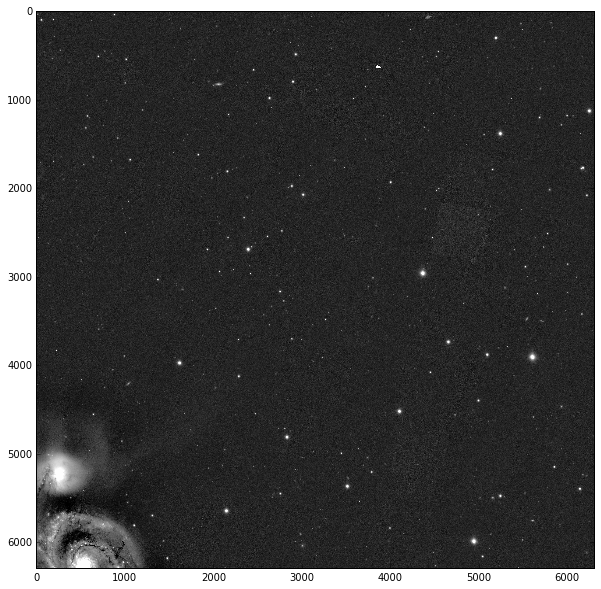

In [3]:
m51 = imread('/Users/cbrasseur/Downloads/m51.png')
plt.figure(figsize=(10, 10))
plt.imshow(m51)

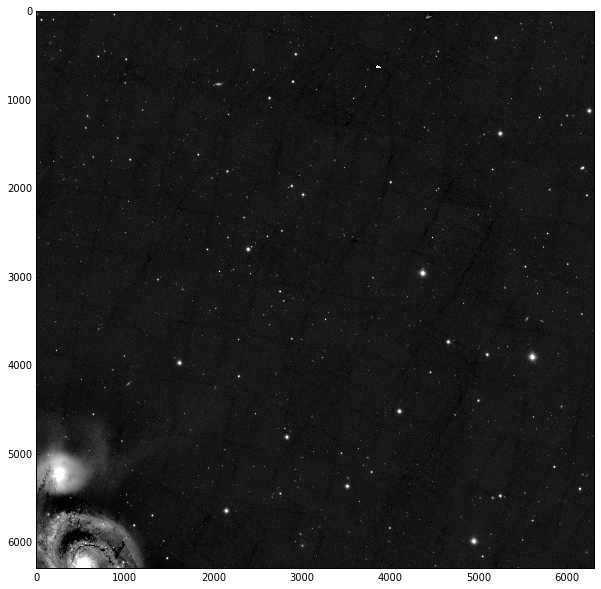

In [12]:
img2 = nd.grey_erosion(m51,size=5)
img2 = nd.grey_dilation(img2,size=5)
plt.figure(figsize=(10, 10))
plt.imshow(img2)